In [39]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import calendar 

In [3]:
import numpy as np
import pandas as pd

In [4]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [6]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# Use Inspect to return names of tables in DB
inspector=inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [8]:
# Use Inspect to return column names and data types for tables
m_columns=inspector.get_columns('measurement')
for m in m_columns:
    print(m['name'], m['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [9]:
# Use Inspect to return column names and data types for tables
s_columns=inspector.get_columns('station')
for s in s_columns:
    print(s['name'], s['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [10]:
# reflect an existing database into a new model

# reflect the tables
Base=automap_base()
Base.prepare(engine, reflect=True)

In [11]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [12]:
# Save references to each table
measurement=Base.classes.measurement
station=Base.classes.station

In [13]:
# Create our session (link) from Python to the DB
session=Session(engine)

# Exploratory Climate Analysis

In [14]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


In [15]:
# determine last station measurement date for precipitation to work back from
lastdate=pd.read_sql_query('''
SELECT date FROM measurement
WHERE id=(SELECT MAX(id) FROM measurement);''',con=engine)
lastdate

,date
0,2017-08-23


In [16]:
# Use Pandas to calcualte the summary statistics for the precipitation data
# query to retrieve the last twelve months of precipitation data sorted by date and placed into datafrme
precipdata_df=pd.read_sql_query('''
SELECT date, prcp FROM measurement WHERE date BETWEEN '2016-08-23' AND '2017-08-23' ORDER BY date;''',con=engine)
precipdata_df

,date,prcp
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
3,2016-08-23,NaN
4,2016-08-23,0.02
...,...,...
2225,2017-08-22,0.50
2226,2017-08-23,0.00
2227,2017-08-23,0.00
2228,2017-08-23,0.08


In [17]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipdata_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


<function matplotlib.pyplot.show(*args, **kw)>

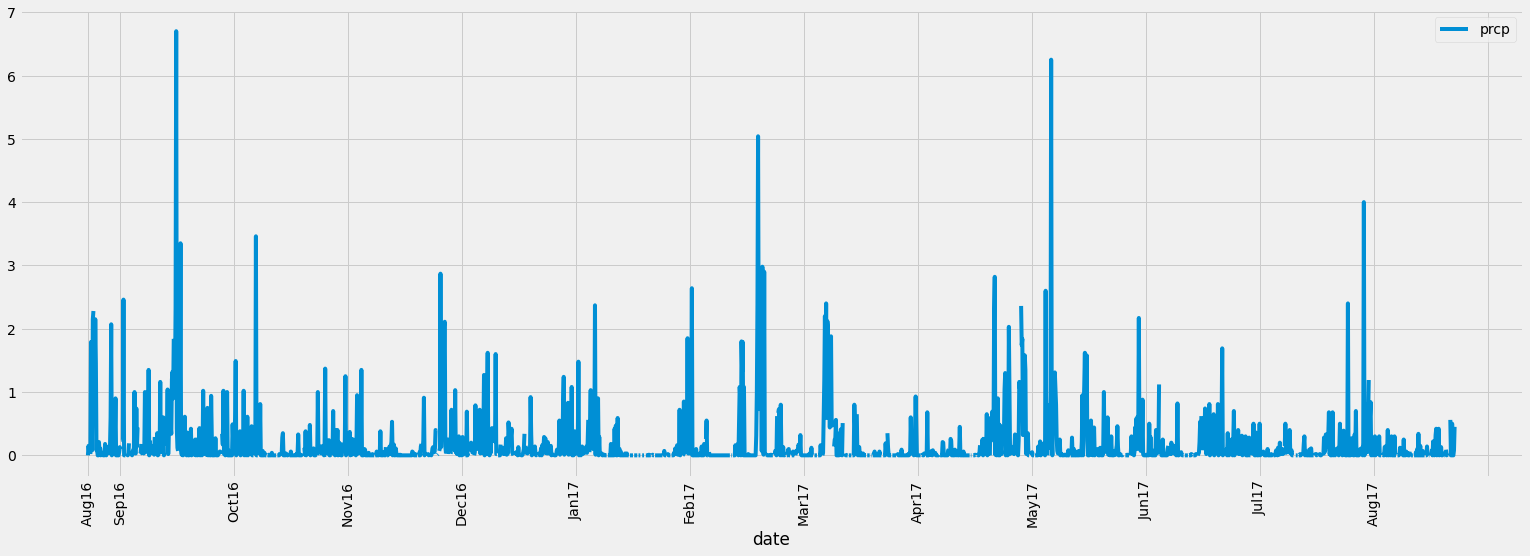

In [47]:
# Plot of rainfall by date for period
ax=plt.gca()
precipdata_df.plot(kind="line", x="date",y="prcp",ax=ax,figsize=(24,8))
plt.xticks([0,52, 238,424,610,796,982,1168,1354,1540,1726,1912,2098,2284], ['Aug16','Sep16', 'Oct16','Nov16','Dec16','Jan17','Feb17','Mar17','Apr17','May17','Jun17','Jul17','Aug17'],rotation=90)
plt.show

In [19]:
# Design a query to show how many stations are available in this dataset?
stationcount=pd.read_sql_query('''SELECT COUNT(DISTINCT(station)) AS station_count FROM measurement;''',con=engine)
stncnt=stationcount.values.tolist()
print(f"The Number of Weather Stations is: {stncnt[0]}")

The Number of Weather Stations is: [9]


In [20]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
activestation=pd.read_sql_query('''
SELECT station, COUNT(station) AS measurement_count FROM measurement
GROUP BY station
ORDER BY measurement_count DESC;''',con=engine)
activestation

,station,measurement_count
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [21]:
# The most active sweather station in terms of total number of measurements 
activestation.head(1)

,station,measurement_count
0,USC00519281,2772


In [22]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
stationtemps=pd.read_sql_query('''
SELECT station,MAX(tobs) AS hi_temp,MIN(tobs)AS lo_temp,AVG(tobs) AS ave_temp FROM measurement
WHERE station='USC00519281'
GROUP BY station
ORDER BY hi_temp;''',con=engine)
stationtemps

,station,hi_temp,lo_temp,ave_temp
0,USC00519281,85.0,54.0,71.663781


In [23]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

# The temperature readings for the last 12 months of the most active station
actstntemps_df=pd.read_sql_query('''
SELECT tobs AS temps FROM measurement
WHERE station='USC00519281' AND date BETWEEN '2016-08-23' AND '2017-08-23';''',con=engine)
actstntemps_df

,temps
0,77.0
1,77.0
2,80.0
3,80.0
4,75.0
...,...
347,77.0
348,77.0
349,76.0
350,76.0


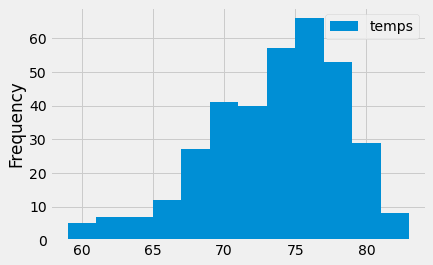

In [24]:
# Plot histogram
actstntemps_df.plot.hist(bins=12)

## Bonus Challenge Assignment

In [25]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(measurement.tobs), func.avg(measurement.tobs), func.max(measurement.tobs)).\
        filter(measurement.date >= start_date).filter(measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [26]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
triptemps=(calc_temps('2017-08-08', '2017-08-23'))
uptt=triptemps[0]
ttmin,ttavg,ttmax=uptt
ttavground=round(ttavg,2)
print(f"The Minimum Temperature for the Prior Year is {ttmin}")
print(f"The Average Temperature for the Prior Year is {ttavground}")
print(f"The Maximum Temperature for the Prior Year is {ttmax}")

The Minimum Temperature for the Prior Year is 70.0
The Average Temperature for the Prior Year is 78.63
The Maximum Temperature for the Prior Year is 85.0


([<matplotlib.axis.YTick at 0x1163396bcd0>,
 <a list of 6 Text major ticklabel objects>)

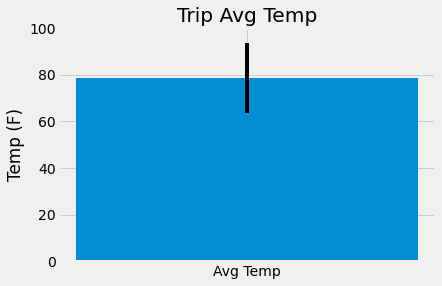

In [27]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

# Unpack the list and then unpack tuple inside and assign items inside to individual variables for min,mave,max
tup=triptemps[0]
mn,av,mx = tup

# Create the Plot
ylab=[0,20,40,60,80,100]
x=['Avg Temp']
y=[av]
y_error=[mn-mx]
plt.bar(x,y,yerr=y_error)
plt.title("Trip Avg Temp")
plt.ylabel("Temp (F)")
plt.yticks(ylab)


In [28]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

totstnrain=pd.read_sql_query('''
SELECT measurement.station,ROUND(SUM(measurement.prcp),2) AS tot_precip, station.latitude,station.longitude,station.elevation FROM measurement
INNER JOIN station ON measurement.station=station.station
WHERE measurement.date BETWEEN '2017-08-08' AND '2017-08-23'
GROUP BY measurement.station
ORDER BY tot_precip DESC;''',con=engine)
totstnrain


,station,tot_precip,latitude,longitude,elevation
0,USC00516128,3.49,21.33310,-157.80250,152.4
1,USC00519281,0.51,21.45167,-157.84889,32.9
2,USC00519523,0.34,21.33556,-157.71139,19.5
3,USC00514830,0.14,21.52130,-157.83740,7.0
4,USC00519397,0.02,21.27160,-157.81680,3.0


In [29]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(measurement.tobs), func.avg(measurement.tobs), func.max(measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [30]:
# The day dates of the trip
tripdates=pd.read_sql_query('''
SELECT DISTINCT(date) FROM measurement
WHERE measurement.date BETWEEN '2017-08-10' AND '2017-08-23'
ORDER BY date ASC;''',con=engine)
tripdates

,date
0,2017-08-10
1,2017-08-11
2,2017-08-12
3,2017-08-13
4,2017-08-14
5,2017-08-15
6,2017-08-16
7,2017-08-17
8,2017-08-18
9,2017-08-19


In [31]:
# The day dates of the trip in a list of only the month and day
tripdates_trunc=tripdates['date'].str.slice(5,10)
tripdate_list=tripdates_trunc.tolist()
tripdate_list

['08-10',
 '08-11',
 '08-12',
 '08-13',
 '08-14',
 '08-15',
 '08-16',
 '08-17',
 '08-18',
 '08-19',
 '08-20',
 '08-21',
 '08-22',
 '08-23']

In [32]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date

normals=[]
for tdate in tripdate_list:
    tdvar=daily_normals(tdate)
    normals.append(tdvar[0]) 
print(normals)

[(65.0, 76.42, 83.0), (67.0, 75.98113207547169, 82.0), (67.0, 76.52727272727273, 83.0), (71.0, 76.98245614035088, 84.0), (71.0, 76.77777777777777, 82.0), (69.0, 76.47169811320755, 83.0), (69.0, 76.08, 83.0), (69.0, 76.125, 83.0), (70.0, 76.92307692307692, 84.0), (69.0, 75.94642857142857, 85.0), (68.0, 76.45283018867924, 82.0), (67.0, 76.4, 83.0), (69.0, 76.47169811320755, 84.0), (67.0, 76.6923076923077, 87.0)]


In [33]:
# turn the prio list of tuples into df for further use
normtup_df=pd.DataFrame(normals,columns=['mini','avg','maxi'])
normtup_df

,mini,avg,maxi
0,65.0,76.420000,83.0
1,67.0,75.981132,82.0
2,67.0,76.527273,83.0
3,71.0,76.982456,84.0
4,71.0,76.777778,82.0
5,69.0,76.471698,83.0
6,69.0,76.080000,83.0
7,69.0,76.125000,83.0
8,70.0,76.923077,84.0
9,69.0,75.946429,85.0


In [34]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
frames =[tripdates,normtup_df]
datnorm_df=pd.concat(frames,axis=1)
datnorm_df

,date,mini,avg,maxi
0,2017-08-10,65.0,76.420000,83.0
1,2017-08-11,67.0,75.981132,82.0
2,2017-08-12,67.0,76.527273,83.0
3,2017-08-13,71.0,76.982456,84.0
4,2017-08-14,71.0,76.777778,82.0
5,2017-08-15,69.0,76.471698,83.0
6,2017-08-16,69.0,76.080000,83.0
7,2017-08-17,69.0,76.125000,83.0
8,2017-08-18,70.0,76.923077,84.0
9,2017-08-19,69.0,75.946429,85.0


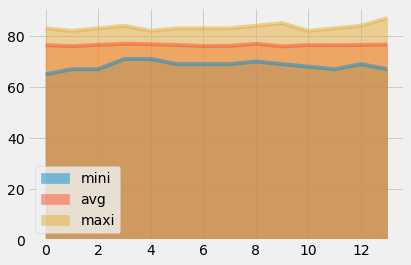

In [35]:
# Plot the daily normals as an area plot with `stacked=False`
datnorm_df.plot(kind='area',stacked=False)
plt.show(block=True)